## **1- Loading the dataset + libraries**

In [41]:
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
!pip install roboflow


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from roboflow import Roboflow
rf = Roboflow(api_key="3hwJ5It8G8YiFoiDLpPq")
project = rf.workspace("nfc-x5ixs").project("soil-classification-cy3ss")
version = project.version(1)
dataset = version.download("yolov7")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Soil-Classification-1 in yolov7pytorch:: 100%|██████████| 2980/2980 [00:06<00:00, 474.41it/s]


In [35]:
path= 'Soil-Classification-1'

In [36]:
# Load dataset configuration
dataset_path = os.path.join(path, "data.yaml")

# Check dataset information
print(open(dataset_path).read())

names:
- Alluvial
- Black
- Clay
- Red
nc: 4
roboflow:
  license: CC BY 4.0
  project: soil-classification-cy3ss
  url: https://universe.roboflow.com/nfc-x5ixs/soil-classification-cy3ss/dataset/1
  version: 1
  workspace: nfc-x5ixs
test: ../test/images
train: Soil-Classification-1/train/images
val: Soil-Classification-1/valid/images



note : "nc" is the number of classes so we have 4 classes (Alluvial,Black,Clay,Red)

## **2- Image Preprocessing**

1- remove unvalid images

In [39]:
bad_files = []  # List to store paths of bad files

# Folders to check
splits = ["train", "valid", "test"]

for split in splits:
    images_folder = os.path.join("Soil-Classification-1", split, "images")

    for file in os.listdir(images_folder):
        file_path = os.path.join(images_folder, file)

        try:
            # Open image to check validity
            with Image.open(file_path) as img:
                img.verify()  # Verifies the image integrity without fully loading it

        except Exception as e:
            # If an error occurs (corrupted image), add to bad_files and remove it
            bad_files.append(file_path)
            print(f"Removing corrupted file: {file_path}")
            os.remove(file_path)

print(f"Removed {len(bad_files)} corrupted images.")


Removed 0 corrupted images.


## **3.1- Training a YOLOv8 Model**


In [15]:
# Install Ultralytics library which has Yolo
!pip install -q ultralytics


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 model (small version)
model = YOLO("yolov8s.pt")

# I'll try to install Yolov7 to see the accuracy

In [40]:
# Installing YOLOv7 
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

d:\Tuwaiq Academy - Aftrificial Intelligence Biulding & Modeling\6. Sixth Week - Computer Vision\CV project\computer-vision-week-project-gharsa\notebooks\yolov7


Cloning into 'yolov7'...
Updating files:  74% (80/108)
Updating files:  75% (81/108)
Updating files:  76% (83/108)
Updating files:  77% (84/108)
Updating files:  78% (85/108)
Updating files:  79% (86/108)
Updating files:  80% (87/108)
Updating files:  81% (88/108)
Updating files:  82% (89/108)
Updating files:  83% (90/108)
Updating files:  84% (91/108)
Updating files:  85% (92/108)
Updating files:  86% (93/108)
Updating files:  87% (94/108)
Updating files:  88% (96/108)
Updating files:  89% (97/108)
Updating files:  90% (98/108)
Updating files:  91% (99/108)
Updating files:  92% (100/108)
Updating files:  93% (101/108)
Updating files:  94% (102/108)
Updating files:  95% (103/108)
Updating files:  96% (104/108)
Updating files:  97% (105/108)
Updating files:  98% (106/108)
Updating files:  99% (107/108)
Updating files: 100% (108/108)
Updating files: 100% (108/108), done.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# trying to trai the model

In [42]:
from keras.callbacks import EarlyStopping

In [44]:
!python train.py --img 640 --batch 16 --epochs 100 --data ../Soil-Classification-1/data.yaml --cfg cfg/training/yolov7-tiny.yaml --weights yolov7-tiny.pt --device 0

Traceback (most recent call last):
  File "d:\Tuwaiq Academy - Aftrificial Intelligence Biulding & Modeling\6. Sixth Week - Computer Vision\CV project\computer-vision-week-project-gharsa\notebooks\yolov7\train.py", line 595, in <module>
    device = select_device(opt.device, batch_size=opt.batch_size)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Tuwaiq Academy - Aftrificial Intelligence Biulding & Modeling\6. Sixth Week - Computer Vision\CV project\computer-vision-week-project-gharsa\notebooks\yolov7\utils\torch_utils.py", line 71, in select_device
    assert torch.cuda.is_available(), f'CUDA unavailable, invalid device {device} requested'  # check availability
           ^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: CUDA unavailable, invalid device 0 requested


Note: The YOLOv8 image size is 640. We can change it, but this is the best size. Additionally, we didn't assign the model to a variable because we are training an existing model and don't want to overwrite it.

##### trial 1

YOLOv8 does the augmentations by itself.

In [27]:
dataset_path

'Soil-Classification-1\\data.yaml'

In [26]:
# Train on the dataset
model.train(data=dataset_path, epochs=100, imgsz=640)

Ultralytics 8.3.120  Python-3.11.9 torch-2.7.0+cpu CPU (Intel Core(TM) i5-10210U 1.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=Soil-Classification-1\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

RuntimeError: Dataset 'Soil-Classification-1/data.yaml' error  Dataset 'Soil-Classification-1/data.yaml' images not found, missing path 'D:\Tuwaiq Academy - Aftrificial Intelligence Biulding & Modeling\6. Sixth Week - Computer Vision\CV project\computer-vision-week-project-gharsa\notebooks\datasets\Soil-Classification-1\valid\images'
Note dataset download directory is 'D:\Tuwaiq Academy - Aftrificial Intelligence Biulding & Modeling\6. Sixth Week - Computer Vision\CV project\computer-vision-week-project-gharsa\notebooks\datasets'. You can update this in 'C:\Users\1xopw\AppData\Roaming\Ultralytics\settings.json'

evaluate

In [ ]:
metrics = model.val(data=dataset_path)

Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1531.2±511.3 MB/s, size: 89.5 KB)


val: Scanning /content/Soil-Classification-1/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]


                   all        127        127       0.83      0.841      0.873      0.639
              Alluvial         19         19      0.709      0.684      0.757        0.6
                 Black         46         46      0.934       0.87      0.915       0.61
                  Clay         22         22      0.813      0.864      0.884      0.656
                   Red         40         40      0.863      0.948      0.937       0.69
Speed: 2.6ms preprocess, 10.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train32


test:


image 1/1 /content/Soil-Classification-1/test/images/2pnxf52_jpg.rf.cde0d4e1ccb9b7876a0357fb9eeecfab.jpg: 640x640 1 Clay, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


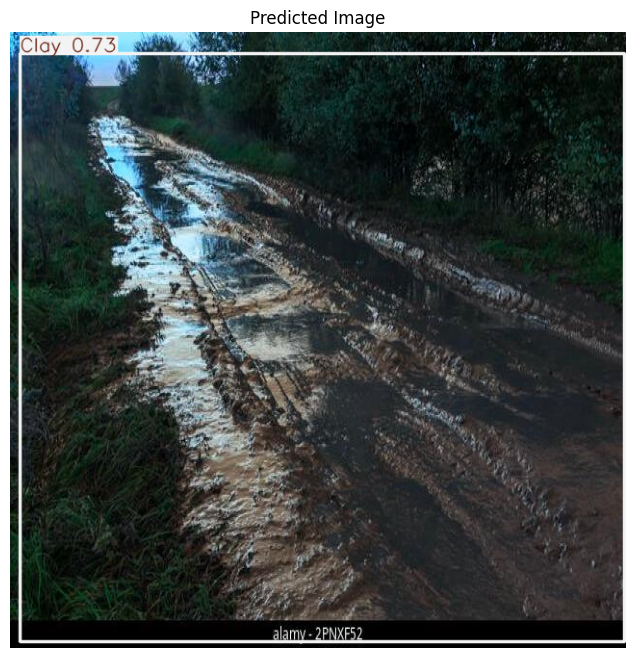

In [ ]:
model = YOLO(model.trainer.best)  # Use the best weights
results = model("/content/Soil-Classification-1/test/images/2pnxf52_jpg.rf.cde0d4e1ccb9b7876a0357fb9eeecfab.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


image 1/1 /content/Soil-Classification-1/test/images/red-soil-500x5002_jpg.rf.eb4f0d7b0a9864ac6c76c564b5e2ecb9.jpg: 640x640 1 Red, 16.3ms
Speed: 2.1ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


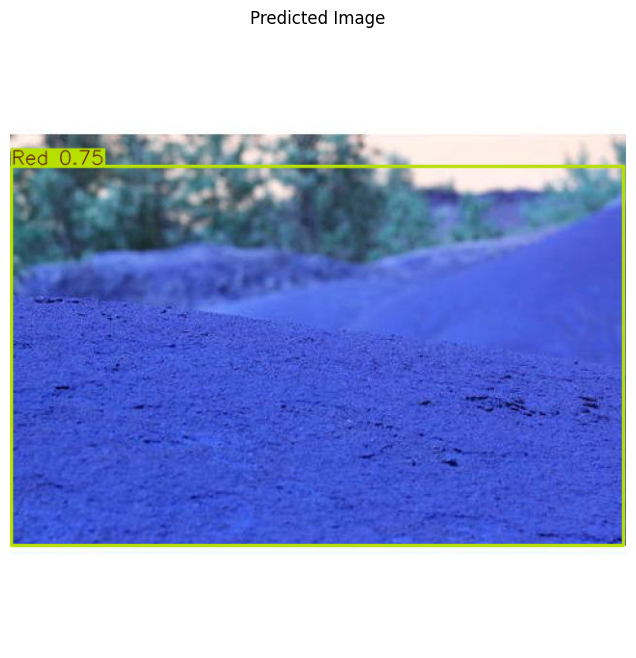

In [ ]:
results = model("/content/Soil-Classification-1/test/images/red-soil-500x5002_jpg.rf.eb4f0d7b0a9864ac6c76c564b5e2ecb9.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


image 1/1 /content/Soil-Classification-1/test/images/Black_12_jpg.rf.5a291d9a108b01a01f8ab2b4585e3120.jpg: 640x640 1 Black, 17.0ms
Speed: 2.8ms preprocess, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


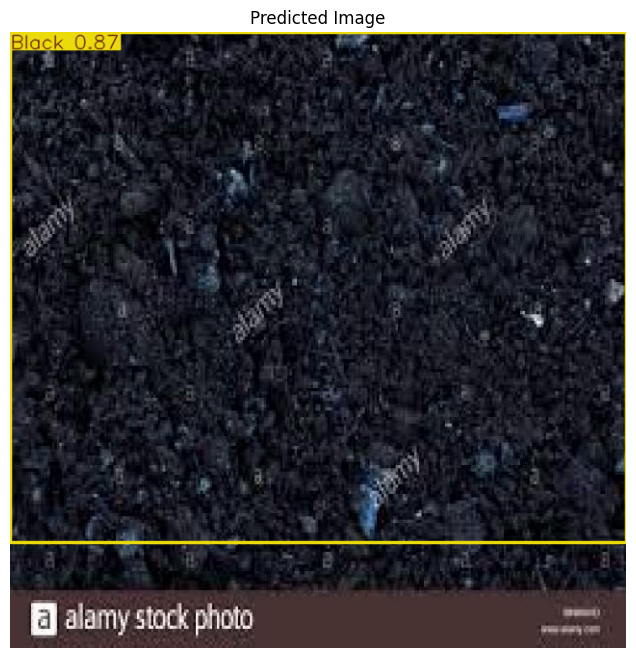

In [ ]:
results = model("/content/Soil-Classification-1/test/images/Black_12_jpg.rf.5a291d9a108b01a01f8ab2b4585e3120.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()

##### trial 2

reload just in case

In [ ]:
model = YOLO("yolov8s.pt")

i will do some changes on the augmentations

In [ ]:
model.train(
    data=dataset_path,
    epochs=100,
    imgsz=640,
    hsv_h=0.015, # this will change the color of the soil, users may take a picture of the soil in imperfect enviroment
    hsv_s=0, # i will set the saturation to zero , i dont think we need it
    hsv_v=0.4, #brightness
    degrees=2, # the angle of the image may change
    translate=0.02, #Users may take pictures of soil that are not always centered.
    scale=0.5, # zoom in and out , we need this
    shear=0, #Shear would create unrealistic soil shapes
    flipud=0.0, #i dont think we need it
    fliplr=0.1,
    mosaic=0, #we dont want to mix soils togother, this will ruine our model performance
    mixup=0 #same as mosaic
)


Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Soil-Classification-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /content/Soil-Classification-1/train/labels.cache... 1293 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1293/1293 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 396.3±142.7 MB/s, size: 81.2 KB)


val: Scanning /content/Soil-Classification-1/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.08G      1.039      2.735      1.908         13        640: 100%|██████████| 81/81 [00:25<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        127        127      0.555      0.622      0.664      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.84G     0.8376      1.129      1.807         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        127        127      0.488      0.611      0.536      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.84G     0.8765      1.029      1.842         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        127        127      0.743      0.505      0.499      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.84G     0.8482     0.9762      1.823         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        127        127        0.6      0.549      0.568      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.84G     0.8204     0.9673      1.788         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        127        127      0.678      0.638       0.67      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.84G     0.7906     0.9094      1.764         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        127        127       0.69      0.774      0.762      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.84G     0.7631       0.86      1.739         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        127        127      0.791      0.736      0.778       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.84G     0.7896     0.7849      1.747         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        127        127      0.799      0.796      0.801      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.84G     0.7457     0.7876      1.706         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        127        127      0.814      0.806      0.838      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.84G     0.7438     0.7792      1.716         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all        127        127      0.723      0.786      0.811      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.84G     0.7622      0.757      1.711         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        127        127      0.757      0.805      0.816      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.84G     0.7794     0.7234      1.726         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        127        127      0.716      0.818      0.818      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.84G     0.7433     0.7102      1.694         14        640: 100%|██████████| 81/81 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all        127        127      0.755      0.828      0.799      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.84G     0.7208     0.6885      1.671         15        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        127        127      0.787      0.738       0.79      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.86G     0.7327      0.686      1.694         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all        127        127      0.824      0.745      0.836      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.9G     0.7325     0.6973      1.671         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        127        127      0.811      0.754      0.794      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.93G     0.7435      0.671      1.693         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        127        127      0.845      0.783      0.824      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.97G      0.682      0.654      1.638         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        127        127      0.655      0.687      0.692      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.01G     0.7115     0.6438      1.658         14        640: 100%|██████████| 81/81 [00:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all        127        127      0.815      0.838      0.819      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.04G     0.6984     0.6129      1.658         14        640: 100%|██████████| 81/81 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        127        127      0.833      0.744      0.819      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.06G     0.7069      0.616      1.671         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        127        127      0.836      0.769       0.79      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.06G     0.7012     0.6191      1.659         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        127        127       0.77      0.869      0.854      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.06G     0.6871     0.6273      1.633         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127      0.756       0.74      0.785      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.06G     0.6621     0.5972      1.626         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        127        127      0.752      0.837      0.817      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.06G      0.673     0.5634      1.627         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        127        127      0.801      0.805      0.837      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.06G      0.676     0.5819      1.638         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        127        127       0.83      0.786      0.843      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.06G     0.6748     0.5636       1.63         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        127        127      0.849      0.779      0.831      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.06G     0.6873     0.5554      1.642         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        127        127      0.868      0.791      0.841      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.06G     0.6704     0.5099      1.617         15        640: 100%|██████████| 81/81 [00:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127      0.806      0.863      0.837       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.06G     0.6394     0.5294      1.589         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        127        127      0.702      0.849      0.834      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.06G     0.6828     0.5219      1.641         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        127        127      0.837       0.76      0.822      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.06G     0.6825     0.5241      1.633         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        127        127      0.804      0.773      0.835      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.06G     0.6264     0.5333      1.569         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        127        127      0.854      0.703      0.803      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.06G     0.6442     0.5133      1.588         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        127        127       0.83      0.758      0.821       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.06G     0.6482     0.5028      1.584         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127      0.828      0.763      0.826      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.06G     0.6544     0.4911      1.593         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all        127        127      0.761      0.826      0.834      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.06G     0.6591      0.533      1.605         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        127        127      0.824      0.749      0.799      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.06G     0.6543     0.5139      1.591         13        640: 100%|██████████| 81/81 [00:24<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        127        127      0.869      0.751      0.838      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.06G     0.6343     0.5087      1.608         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        127        127      0.831      0.774      0.829      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.06G     0.6302     0.4703      1.591         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        127        127       0.88      0.811       0.85      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.06G      0.623     0.4555      1.572         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        127        127       0.73      0.816      0.823      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.06G     0.6359     0.4648      1.569         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        127        127      0.768      0.762       0.82      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.06G      0.652     0.4576      1.585         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        127        127      0.807      0.794       0.81      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.06G     0.6209     0.4693      1.568         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        127        127      0.893      0.813      0.852      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.06G      0.617     0.4491      1.552         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127      0.787      0.726      0.793      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.06G     0.6118      0.446      1.561         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        127        127      0.758      0.796      0.815      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.06G     0.6168     0.4331      1.557         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        127        127      0.795      0.824      0.837      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.06G      0.614     0.4492      1.555         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127        0.8      0.805       0.85      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.06G     0.6024     0.4514      1.549         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all        127        127      0.827      0.757       0.85      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.06G     0.5853     0.4273      1.532         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        127        127      0.798      0.707      0.807      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.06G     0.5914     0.4488       1.53         14        640: 100%|██████████| 81/81 [00:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        127        127      0.779       0.78      0.816      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.06G     0.5857     0.4095      1.527         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        127        127      0.772      0.751      0.837      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.06G     0.5808     0.4275      1.516         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        127        127      0.818      0.755      0.799      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.06G     0.5797     0.4444      1.517         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all        127        127      0.823      0.781      0.828      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.06G     0.5946     0.4033       1.53         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        127        127      0.794      0.797      0.824      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.06G     0.5925     0.4172      1.536         14        640: 100%|██████████| 81/81 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127      0.779      0.763      0.813      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.06G     0.5815     0.3898      1.519         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        127        127      0.761      0.783      0.796      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.06G     0.5988     0.4128       1.52         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all        127        127      0.868      0.769      0.838       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.06G     0.5739     0.3848      1.503         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        127        127      0.754      0.791      0.844      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.06G     0.5676     0.3904      1.502         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        127        127       0.78      0.794      0.826      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.06G     0.5588     0.3749      1.487         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        127        127      0.756      0.759       0.79      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.06G     0.5672     0.3889      1.512         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        127        127      0.751      0.784      0.804      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.06G     0.5639     0.3686      1.501         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        127        127      0.766      0.809      0.816      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.06G     0.5477     0.3795      1.476         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        127        127        0.8      0.768      0.825      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.06G     0.5702     0.3782       1.49         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        127        127      0.758      0.748      0.817      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.06G     0.5313     0.3698      1.463         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127       0.79      0.783      0.819       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.06G     0.5517     0.3762      1.465         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127      0.769      0.751      0.835      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.06G     0.5373     0.3583       1.47         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        127        127      0.793       0.78      0.832      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.06G     0.5315     0.3406      1.469         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all        127        127      0.768      0.815      0.809      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.06G      0.536     0.3523      1.455         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        127        127      0.821      0.784      0.848      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.06G     0.5343     0.3551      1.451         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        127        127      0.832      0.776      0.841      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.06G     0.5209     0.3279       1.45         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        127        127      0.789      0.729      0.793      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.06G     0.5126     0.3223       1.44         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        127        127      0.814      0.782      0.818       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.06G     0.5213     0.3471      1.436         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        127        127      0.772      0.803      0.818      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.06G     0.5259     0.3361      1.433         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        127        127      0.753       0.77      0.795      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.06G     0.5009     0.3274      1.414         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127      0.753       0.76      0.809      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.06G      0.508     0.3178      1.422         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        127        127      0.767      0.779      0.801      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.06G     0.4847     0.3182      1.406         14        640: 100%|██████████| 81/81 [00:22<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all        127        127      0.768      0.821       0.79      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.06G     0.4893     0.3313      1.411         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        127        127      0.765      0.774      0.795      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.06G     0.5055     0.3296      1.414         15        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        127        127      0.773      0.787      0.796      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.06G     0.4898     0.3093      1.405         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        127        127      0.753      0.766      0.778      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.06G     0.4915     0.3043      1.402         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127      0.768      0.805      0.799      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.06G     0.4858     0.3046      1.383         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        127        127      0.773      0.788      0.811      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.06G     0.4838     0.3084      1.387         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        127        127      0.801      0.774      0.812       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.06G     0.4819     0.2957      1.396         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        127        127      0.793      0.788      0.796      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.06G     0.4642     0.2877      1.373         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        127        127      0.805       0.78      0.808       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.06G     0.4879     0.2983      1.379         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all        127        127      0.756      0.782      0.796      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.06G       0.45     0.2779      1.349         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        127        127      0.741      0.801      0.784      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.06G     0.4536     0.2826      1.367         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        127        127      0.758      0.811      0.811      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.06G     0.4539     0.2942      1.349         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        127        127       0.77      0.768      0.801       0.54


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.06G      0.466     0.2802      1.361         13        640: 100%|██████████| 81/81 [00:24<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all        127        127      0.746      0.798      0.813      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.06G     0.4503     0.2745      1.341         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]

                   all        127        127      0.764      0.782      0.794      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.06G      0.451     0.2783      1.348         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        127        127      0.782      0.764      0.778      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.06G     0.4431     0.2854       1.34         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        127        127      0.776      0.777      0.785      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.06G     0.4361     0.2691      1.332         15        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        127        127      0.771      0.765      0.785      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.06G     0.4183     0.2647      1.317         13        640: 100%|██████████| 81/81 [00:23<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        127        127      0.794      0.765      0.789      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.06G     0.4283     0.2505      1.313         14        640: 100%|██████████| 81/81 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        127        127      0.768      0.777      0.786      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.06G     0.4233     0.2633      1.326         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        127        127      0.768      0.781      0.778      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.06G     0.4166     0.2672      1.306         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        127        127      0.765      0.777      0.774      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.06G     0.4141     0.2668      1.292         13        640: 100%|██████████| 81/81 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        127        127      0.759      0.752      0.777       0.53



100 epochs completed in 0.691 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


                   all        127        127      0.893      0.813      0.852      0.613
              Alluvial         19         19      0.667      0.737      0.699      0.567
                 Black         46         46       0.96      0.848      0.901      0.574
                  Clay         22         22          1      0.808      0.878      0.634
                   Red         40         40      0.945       0.86      0.928      0.678
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be25b1042d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

results:

Precision (B): 0.893

Recall (B): 0.813

mAP50 (B):0.852

mAP50-95 (B): 0.613

Fitness: 0.637

## **3.2- Training a YOLOv7 Model**
